In [1]:
# %%
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# %%
# Load dataset CSV
df = pd.read_csv('penguins.csv')

In [5]:
# Hapus kolom yang tidak relevan ('id' dan 'year')
df = df.drop(columns=['id', 'year'])

In [6]:
# Tampilkan 5 data awal
print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    male  
1       3800.0  female  
2       3250.0  female  
3          NaN     NaN  
4       3450.0  female  


In [7]:
# %%
# Cek informasi kolom dan target
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


In [8]:
# Menghapus baris dengan nilai yang hilang
df = df.dropna()

In [9]:
# Encode data kategorikal ('island' dan 'sex')
df = pd.get_dummies(df, columns=['island', 'sex'], drop_first=True)

In [10]:
# Encode target label ('species')
species_mapping = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
df['species'] = df['species'].map(species_mapping)

In [11]:
# Tampilkan ringkasan dataset setelah preprocessing
df.describe().T

,count,mean,std,min,25%,50%,75%,max
species,333.0,0.918919,0.889718,0.0,0.0,1.0,2.0,2.0
bill_length_mm,333.0,43.992793,5.468668,32.1,39.5,44.5,48.6,59.6
bill_depth_mm,333.0,17.164865,1.969235,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,333.0,200.966967,14.015765,172.0,190.0,197.0,213.0,231.0
body_mass_g,333.0,4207.057057,805.215802,2700.0,3550.0,4050.0,4775.0,6300.0


In [12]:
# %%
# Show the data
df.head(10)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_male
0,0,39.1,18.7,181.0,3750.0,False,True,True
1,0,39.5,17.4,186.0,3800.0,False,True,False
2,0,40.3,18.0,195.0,3250.0,False,True,False
4,0,36.7,19.3,193.0,3450.0,False,True,False
5,0,39.3,20.6,190.0,3650.0,False,True,True
6,0,38.9,17.8,181.0,3625.0,False,True,False
7,0,39.2,19.6,195.0,4675.0,False,True,True
12,0,41.1,17.6,182.0,3200.0,False,True,False
13,0,38.6,21.2,191.0,3800.0,False,True,True
14,0,34.6,21.1,198.0,4400.0,False,True,True


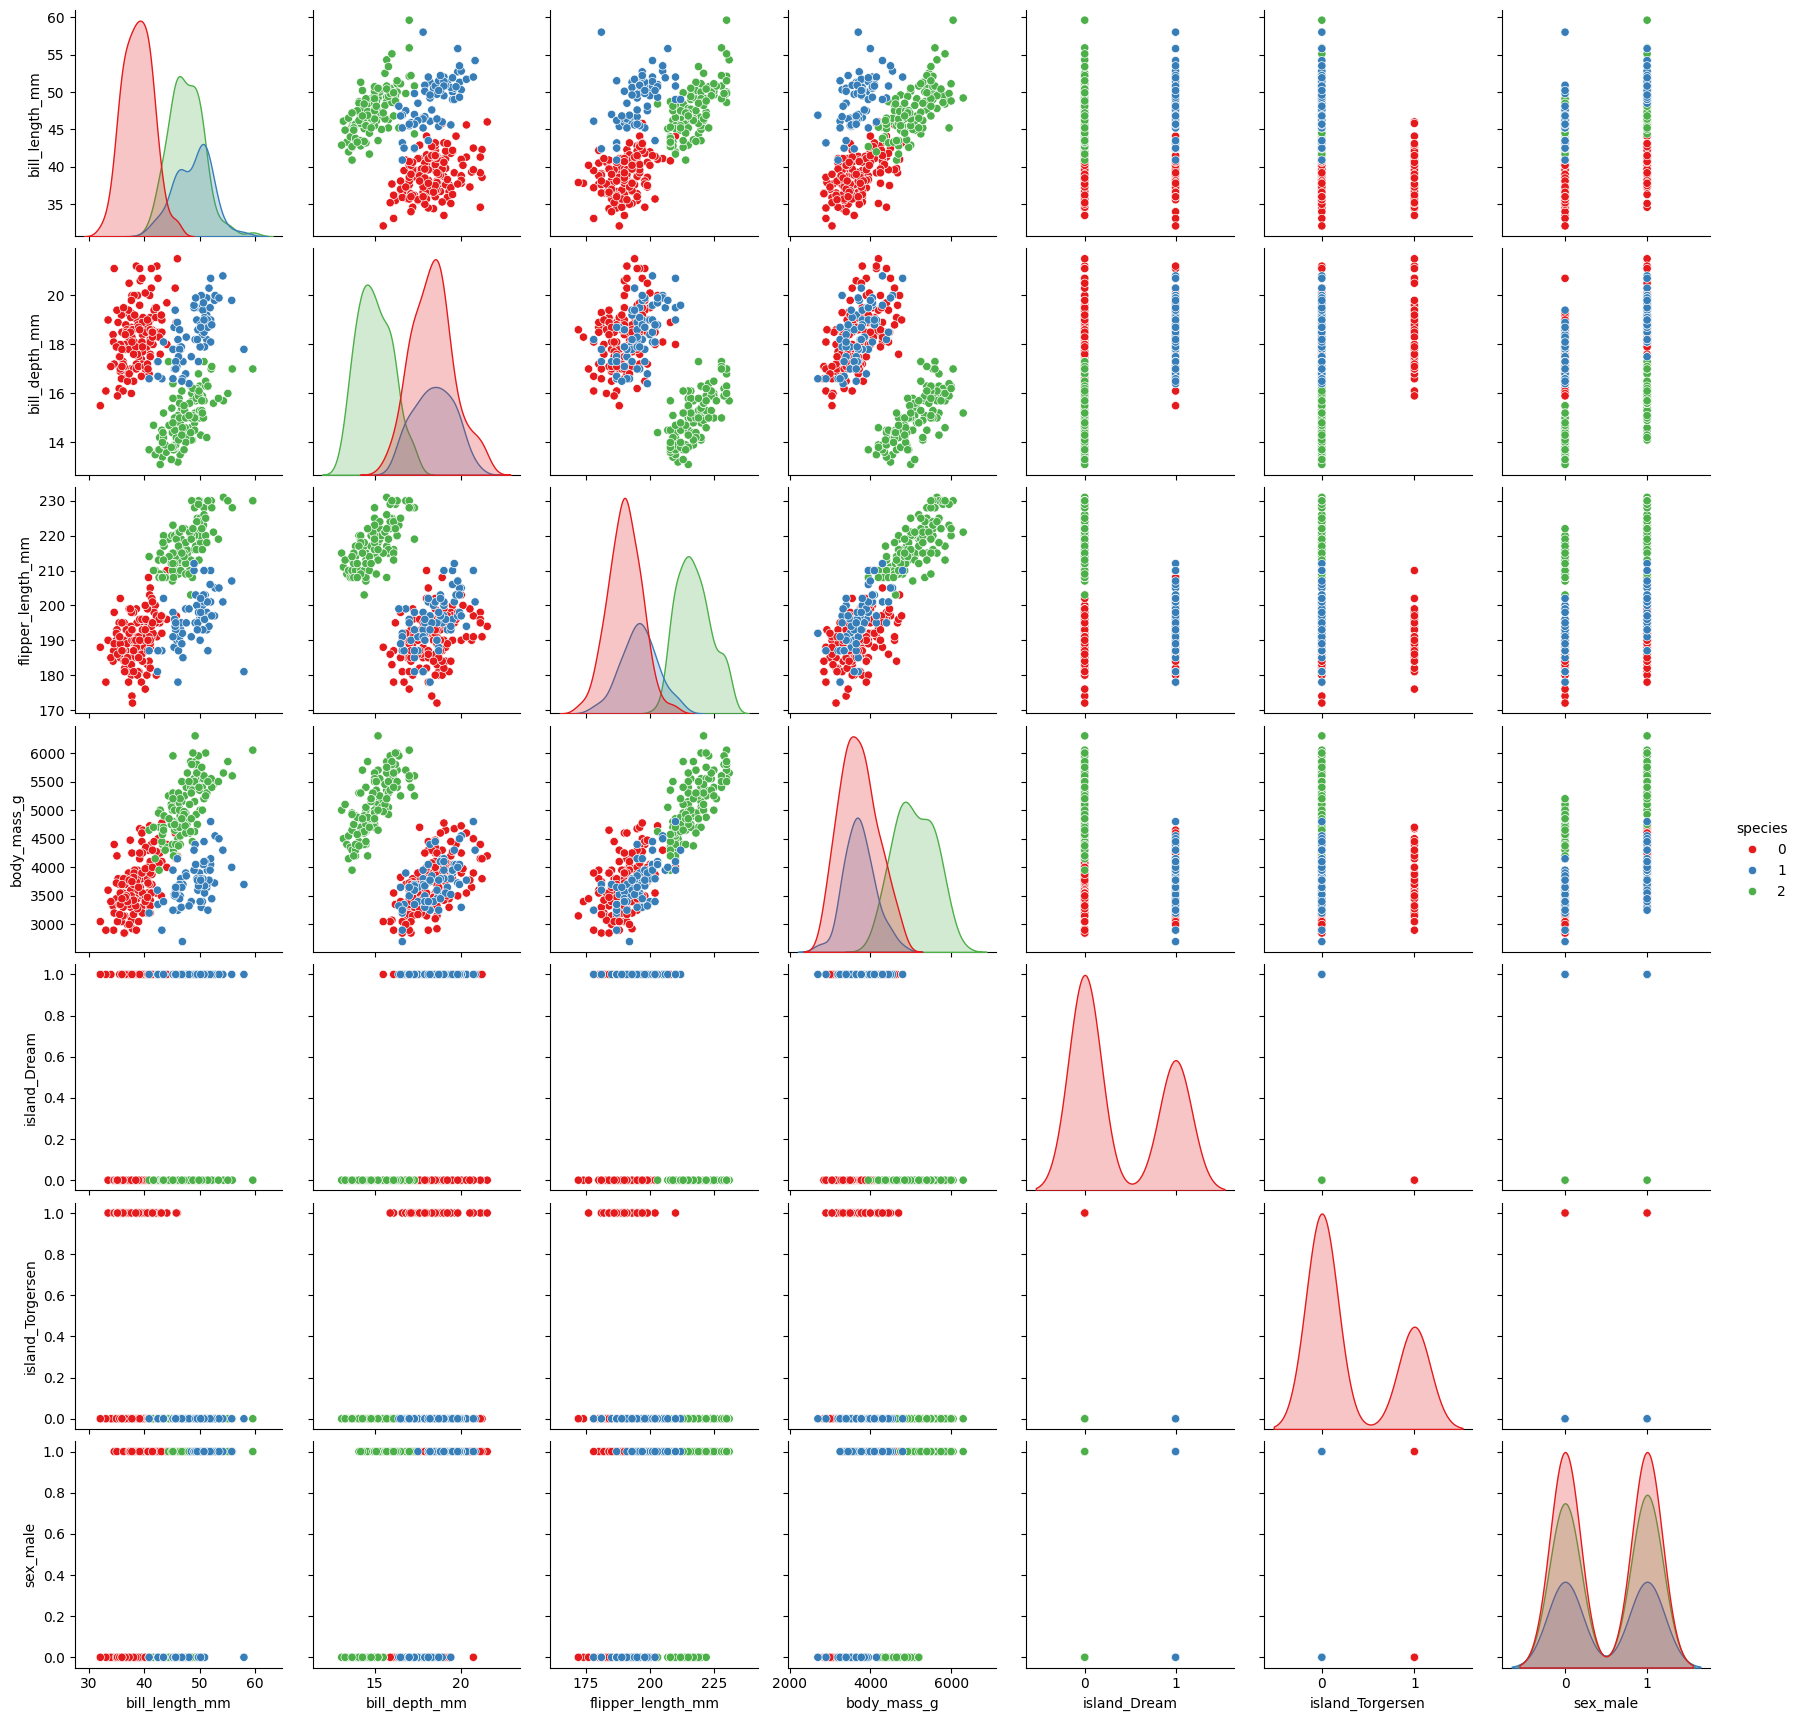

In [13]:
# %%
# Visualisasi data
sns.pairplot(df, hue='species', palette='Set1')
plt.show()

In [14]:
# %%
# Split data menjadi training (70%) dan testing (30%)
X = df.drop(columns=['species'])
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Menampilkan jumlah data training
print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

Jumlah data training: 233
Jumlah data testing: 100


In [15]:
# %%
# Inisialisasi model Decision Tree
model = DecisionTreeClassifier(random_state=10)
model.fit(X_train, y_train)

# Prediksi data uji
y_pred = model.predict(X_test)

In [16]:
# %%
# Classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        40

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



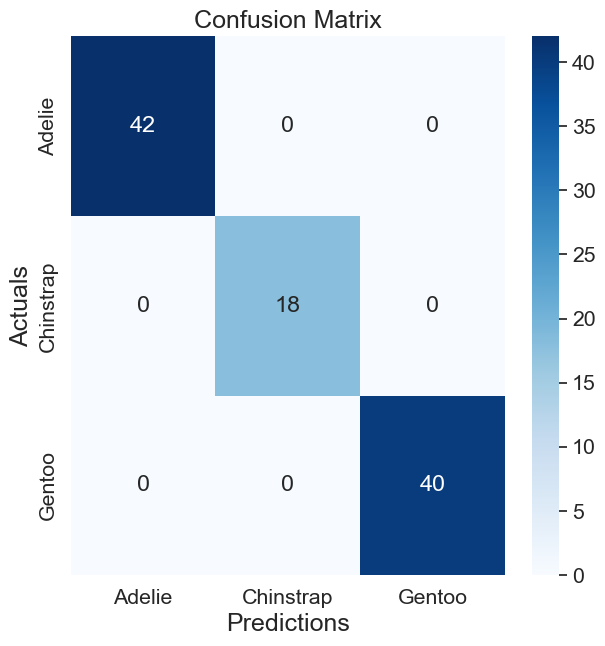

In [17]:
# %%
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(7,7))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=species_mapping.keys(), yticklabels=species_mapping.keys())
plt.xlabel("Predictions", fontsize=18)
plt.ylabel("Actuals", fontsize=18)
plt.title("Confusion Matrix", fontsize=18)
plt.show()


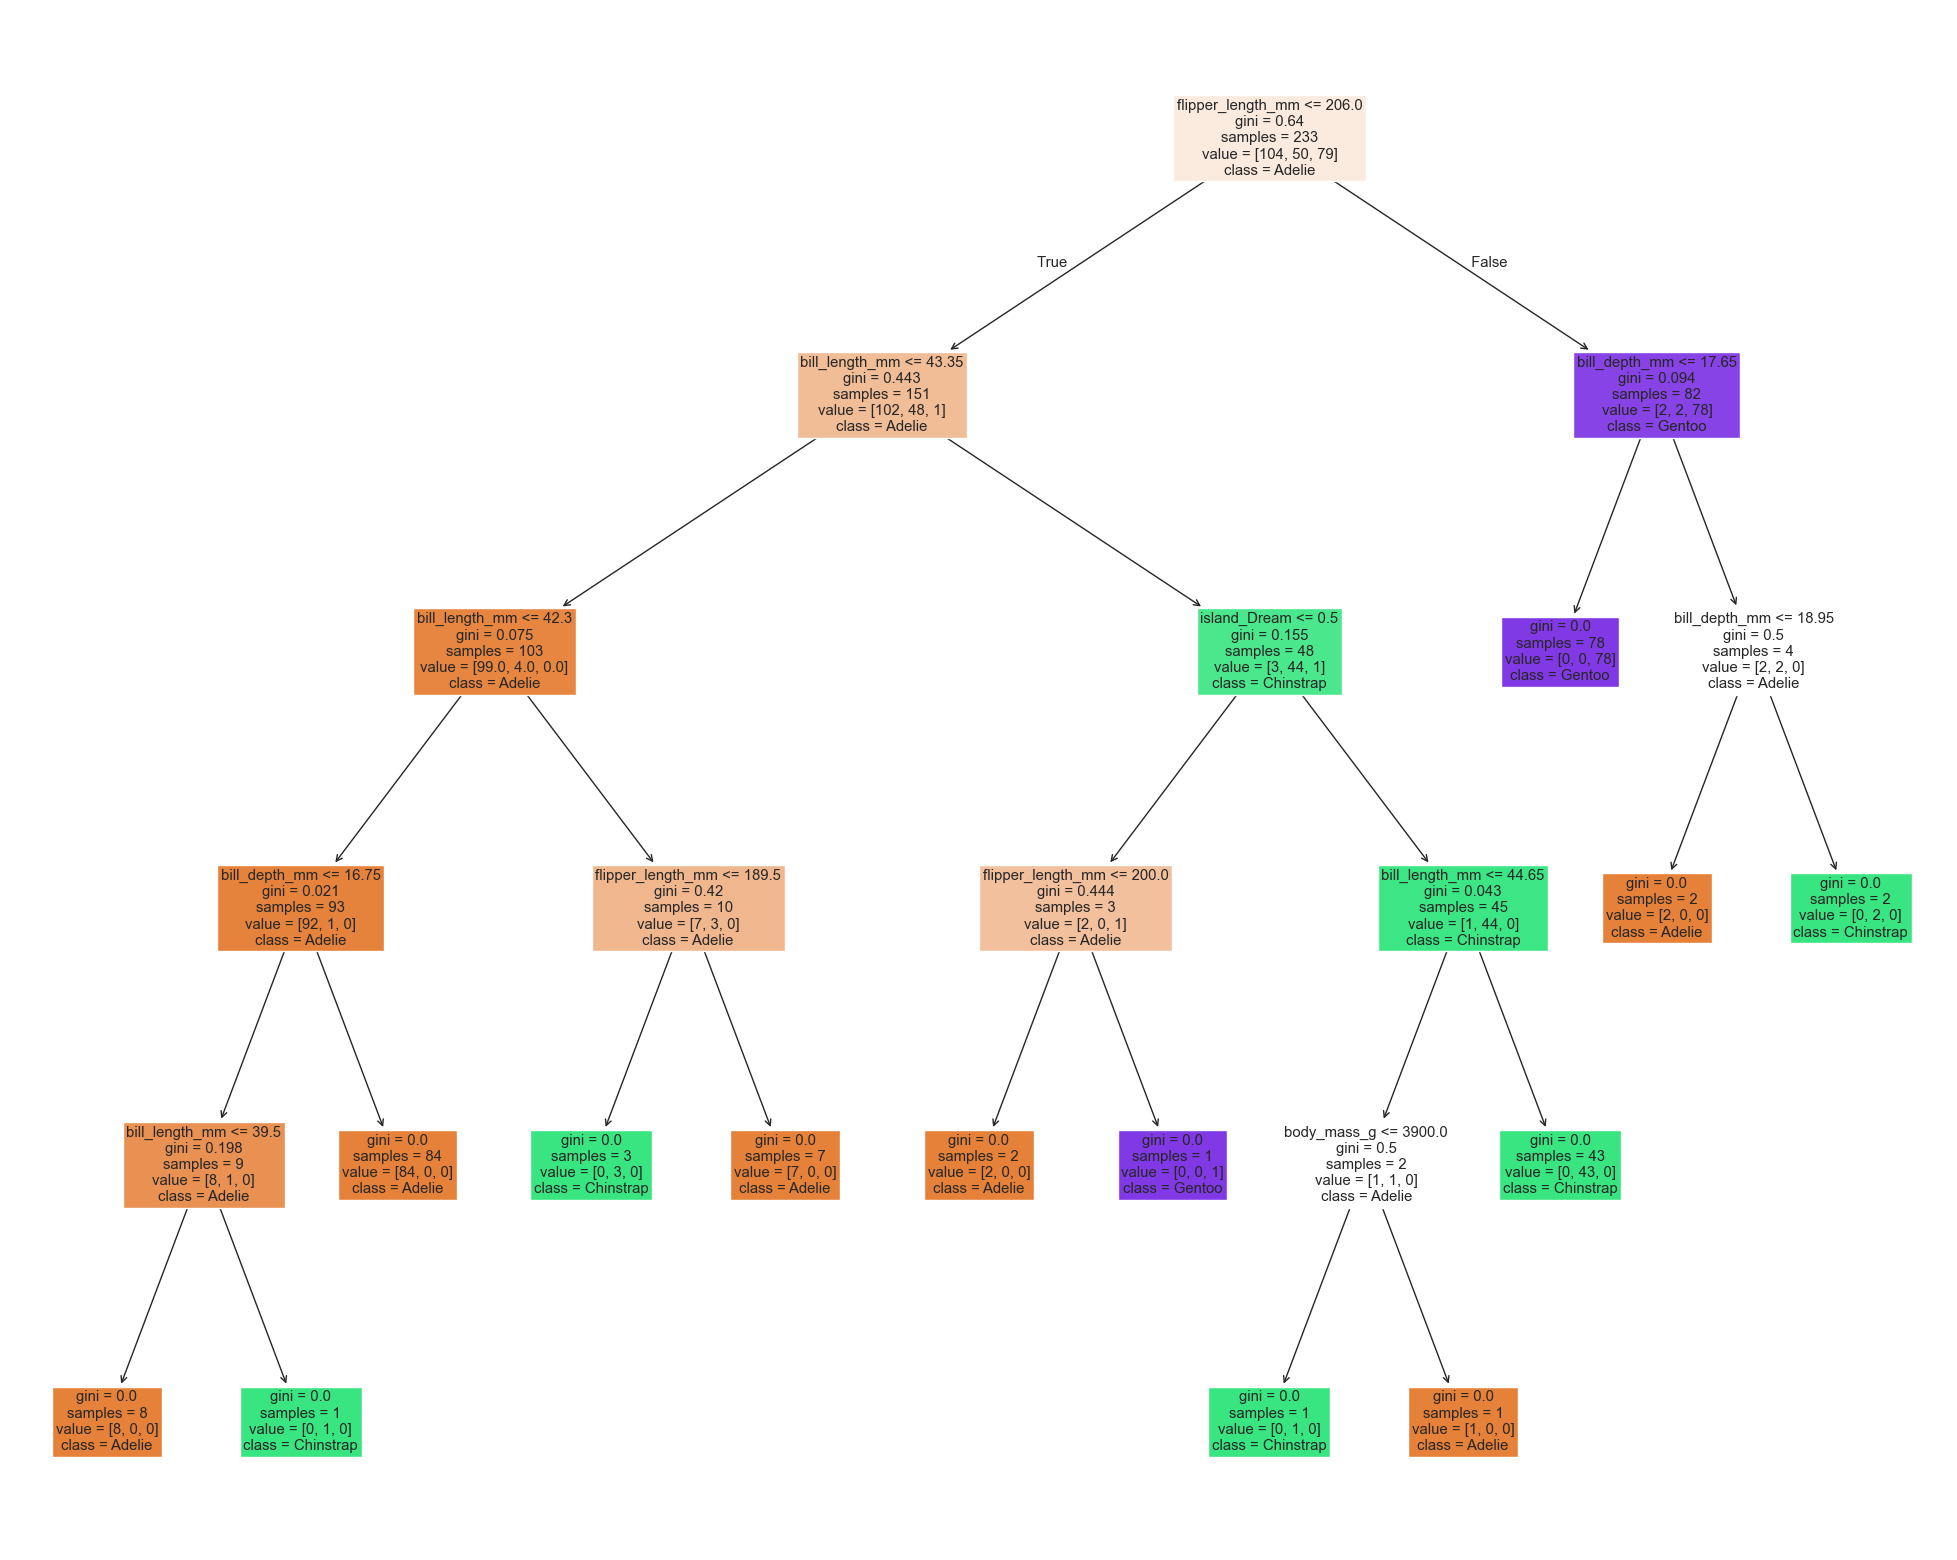

In [18]:
# %%
# Visualisasi pohon keputusan
plt.figure(figsize=(25,20))
plot_tree(model, feature_names=X.columns, class_names=list(species_mapping.keys()), filled=True)
plt.show()

In [19]:
# %%
# Contoh data penguin baru untuk diuji
penguin_test_data = {
    'bill_length_mm': 45.0,
    'bill_depth_mm': 15.0,
    'flipper_length_mm': 210,
    'body_mass_g': 4500,
    'island_Dream': 1,  # Dream = 1, jika tidak maka 0
    'island_Torgersen': 0,  # Torgersen = 1, jika tidak maka 0
    'sex_male': 1  # Male = 1, Female = 0
}

# Ubah data menjadi DataFrame dan pastikan urutan kolom sesuai
feature_order = X.columns
prediction_input_df = pd.DataFrame([penguin_test_data])

# Prediksi spesies penguin baru
prediction = model.predict(prediction_input_df[feature_order])
species_reverse_mapping = {v: k for k, v in species_mapping.items()}
predicted_species = species_reverse_mapping[prediction[0]]

print("Prediksi spesies penguin:", predicted_species)

Prediksi spesies penguin: Gentoo
